In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.plotting import figure
from bokeh.io import show,output_notebook
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Lecture du Dataset

In [2]:
data=pd.read_csv("dataset.csv")

In [28]:
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.000000,0,0.00,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.000000,0,0.00,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.000000,0,0.00,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.000000,0,0.00,19,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.000000,0,0.00,1,0.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.000000,0,0.00,0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.000000,0,0.00,2,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.000000,0,0.00,3,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


# Visualisation

In [4]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
data.shape

(12330, 18)

In [6]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [7]:
data.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

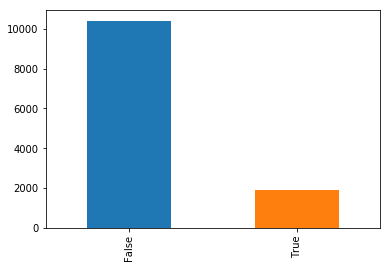

In [8]:
data.Revenue.value_counts().plot(kind="bar")

In [9]:
serie = data.isnull().sum(axis=0)
serie

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
data.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


C:\Users\aymer\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


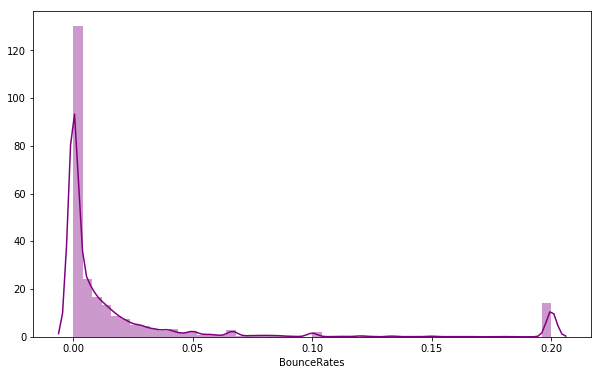

In [11]:
plt.figure(figsize=(10,6))
sns.distplot(data['BounceRates'],color='purple')
plt.show()

Text(0, 0.5, 'Revenue')

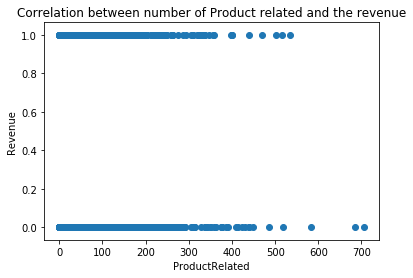

In [12]:
plt.scatter(data['ProductRelated'],data['Revenue'])
plt.title("Correlation between number of Product related and the revenue")
plt.xlabel("ProductRelated")
plt.ylabel("Revenue")

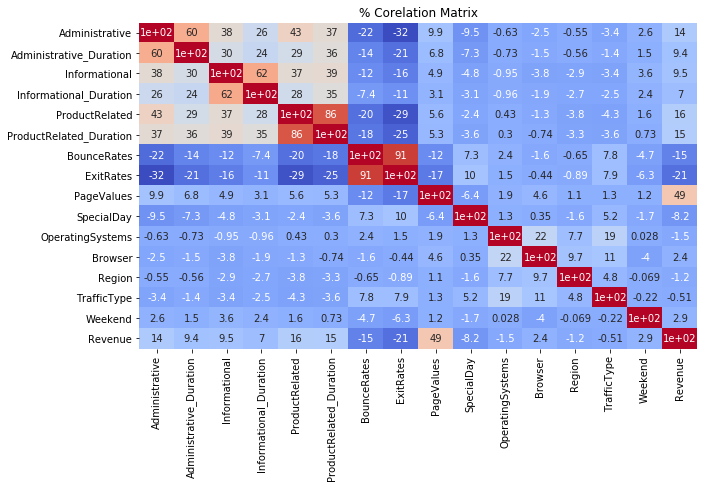

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(cbar=False,annot=True,data=data.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

In [14]:
p=figure(plot_width=600,plot_height=600,title='Comparaison between time spent on news sites and product sites',x_axis_label='Number of appearances on the different types of sites ',y_axis_label='Time spent on the sites')
x=data['ProductRelated']
y=data['ProductRelated_Duration']
z=data['Informational']
k=data['Informational_Duration']
p.circle(x,y,size=12,color='red',alpha=0.6)
p.square(z,k,size=12,color='navy',alpha=0.6)
output_notebook()
show(p)


Loading BokehJS ...

# Modification du dataset

In [3]:
data=data[['ProductRelated','Informational','PageValues','Administrative','Revenue']]
X=data.drop("Revenue",axis=1)
y=data.Revenue

# Modélisation

In [4]:
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 300,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(12030, 4) (300, 4) (12030,) (300,)


0.8809642560266001
0.8966666666666666
{'C': 0.1}
0.8807980049875311


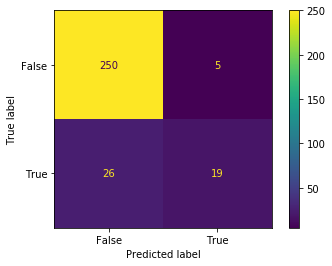

In [14]:
lm=LogisticRegression()
C_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
modele_lm= GridSearchCV(LogisticRegression(),C_values,scoring="accuracy",cv=5)
modele=modele_lm.fit(X_train,y_train)
y_pred = modele.predict(X_test)
print(modele.score(X_train,y_train))
print(modele.score(X_test,y_test))

print(modele_lm.best_params_)
scoremodele1=modele_lm.best_score_
print(scoremodele1)

plot_confusion_matrix(modele,X_test,y_true=y_test)
joblib.dump(modele,"./modele_saved")
load_model=joblib.load("modele_saved")

0.8960099750623441
0.8833333333333333
0.8941812136325851
{'n_neighbors': 50, 'weights': 'uniform'}


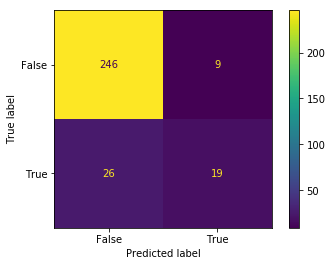

In [16]:
knn=KNeighborsClassifier()
dico_param_knn={"n_neighbors": [2,5,10,50,100],"weights":['uniform','distance']}
modele_knn=GridSearchCV(knn,dico_param_knn,scoring="accuracy",cv=5)
modele2=modele_knn.fit(X_train, y_train)
print(modele2.score(X_train, y_train))
print(modele2.score(X_test,y_test))
plot_confusion_matrix(modele2,X_test,y_true=y_test)

scoremodele2=modele_knn.best_score_
print(scoremodele2)
print(modele_knn.best_params_)

0.8956774729842062
0.8766666666666667


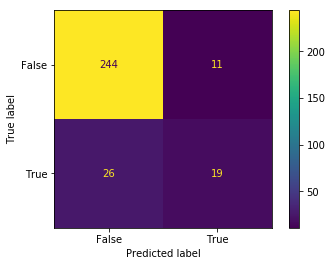

In [13]:
mvs = svm.SVC()
modele3 = mvs.fit(X_train,y_train)
print(modele3.score(X_train, y_train))
scoremodele3=modele3.score(X_test,y_test)
print(scoremodele3)
y_pred3 = modele.predict(X_test)
plot_confusion_matrix(modele3,X_test,y_true=y_test)

{'max_depth': 5, 'n_estimators': 100}
0.8959268495428094


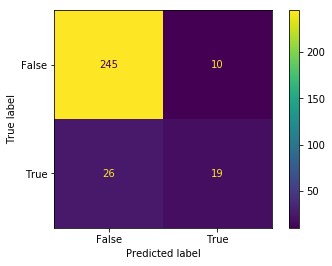

In [11]:
dico_param={"max_depth": list(range(2,10)), "n_estimators":[10,20,50,100]}
Grid_search= GridSearchCV(RandomForestClassifier(),dico_param,scoring="accuracy",cv=5)
Grid=Grid_search.fit(X_train,y_train)
y_pred4 = Grid.predict(X_test)
plot_confusion_matrix(Grid,X_test,y_true=y_test)

print(Grid_search.best_params_)
scoremodele4=Grid_search.best_score_
print(scoremodele4)

([<matplotlib.axis.XTick at 0x1ad37410d68>,
 <a list of 4 Text xticklabel objects>)

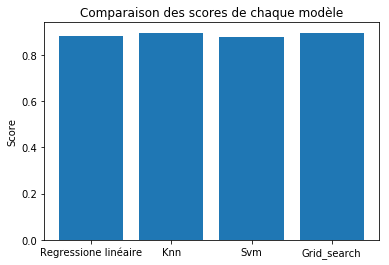

In [42]:
plt.bar(range(4),[scoremodele1,scoremodele2,scoremodele3,scoremodele4])
plt.title("Comparaison des scores de chaque modèle")
plt.ylabel("Score")
x=np.linspace(0,3,4)
plt.xticks(x,["Regressione linéaire","Knn","Svm","Grid_search"])

# Conclusion :#
on peut voir que le meilleur modèle est celui du grid_search!